<center><h1>Text Classification of Quizbowl Questions</h1></center>

<center><h3>Alex Damisch</center></h3>
<center><h3>27 November 2017</center></h3>

# Text Classification of Quizbowl Questions
### Alex Damisch
### 27 November 2017
## I. Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Quizbowl (or quiz bowl) is a competitive interscholastic knowledge game played at the middle school, high school, and collegiate levels. Teams of four compete using *Jeopardy!*-style buzzers on questions dealing with mostly academic subjects: primarily history, literature and science, but also religion, mythology, philosophy, the social sciences and fine arts, and occasionally popular culture.<sup>[1]</sup>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;All quizbowl questions are read out loud by a third-party moderator. There are 
two types of quizbowl questions: tossups and bonuses. Tossups are multi-sentence, paragraph-length questions that anyone on either team can answer. Each sentence describes the same answer, and the descriptions get increasingly obvious with each successive sentence. Any player can interrupt the moderator by buzzing in. If they are incorrect, they lose 5 points, and the moderator continues reading the tossup—but the team of the person who answered the question incorrectly cannot ring in again. (It is thus advantageous for the team that had not yet answered to wait until the very end of the question, since they are no longer racing to answer the tossup first.) If they answer the question correctly, they gain 10 points, and the moderator will read a three-part bonus question just to the team that answered the tossup question correctly. Each bonus part is worth 10 points on the same subject, which may or may not be on the same subject as the tossup; there is no penalty for answering bonus parts incorrectly. After the bonus is complete,another tossup is read to all players. There are usually 20-24 tossup/bonus “cycles” per game, and a typical quizbowl tournament will have 10-13 games.<sup>[2]</sup>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recycling old quizbowl questions is considered a cardinal sin in the community;<sup>[3]</sup> however, it is generally accepted  that reading old questions is a good way to improve as a quizbowler.<sup>[4]</sup>  As a result, over the years a number of online databases of past questions have been created so players can review old questions.<sup>[5]</sup> Since quizbowl is a team activity, a biology major may specialize in e.g. science questions, and not particularly about reading old literature questions. As such, it is useful for the database to classify old questions and include a search feature so that an individual can only see they questions that they want to. However, it is time-consuming for a human to classify all of these questions. Tournaments will frequently include frequently include 15 rounds of questions, just in case of a tie in the standings, an error in a question or by a moderator that requires a question to be thrown out, etc. The benefit of automatically classifying 600 questions for dozens and dozens of tournaments per year is clear. There are also sub-distributions to consider (for example, science questions can be  classified into biology, chemistry, physics, etc.).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project will attempt to improve on existing methods to classify quizbowl tossups into the proper subject categories.

## II. Data Description

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;QuizDB was publicly announced on September 10, 2017, as the successor to another database called Quinterest. (QuizDB’s hosting fees are currently paid for the Partnership for Academic Competition Excellence<sup>[6]</sup>, of which I am a member.<sup>[7]</sup>) It is maintained by Raynor Kuang, a former quizbowler from Harvard and the Thomas Jefferson High School for Science and Technology. He provided 100,006 questions--initially by email to me, and then publicly on the Quizbowl Resource Center forums<sup>[8]</sup>.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Initially, there were three variables in this dataset, as provided by Raynor:

|          Texts              |          Categories             |            Subcategories          |
|-----------------------------|---------------------------------|-----------------------------------|
| The texts of the questions  | The categories of the questions | The subcategories of the questions|

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The categories' and subcategories' levels and distribution will be discussed further in the Data Cleaning and Data Analysis section.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In correspondence, Kuang indicated the accuracy that he had thus far achieved when automatically classifying questions:


>*Currently,* all auto-imported questions (using Augur, my parser tech) uses a Naive Bayesian classifier to categorize + subcategorize questions. From there, admins can fix any mistaken assignments. During testing I routinely got 90% and 80% accuracy for category and subcategory, respectively, so I'm moderately confident in the categorization. As you say, it does look like History, Lit[erature], and Myth[ology] are most commonly confused because of their frequent "character" typology.<sup>[9]</sup>
>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It may also be useful to see an example of tossups and bonuses. I wrote the following tossup for the 2017 Eisenhower Memorial Tournament, a collegiate quizbowl set written for undergraduate students, and it appears in the data set:<sup>[10]</sup>



In [1]:
import os
os.chdir('/Users/alexdamisch/Desktop')
import json
with open('quizdb_classifier_training_data.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())
data['texts'][1491]

'This singer collaborated with the Count Basie Orchestra on the album One O\'Clock Jump, and with a full orchestra and Louis Armstrong on an album of solo and duet covers from Porgy and Bess. This artist covered the Gershwins again on a song from a 1924 musical that Nelson Riddle arranged for this singer as a ballad; that song is "Oh, (*) Lady Be Good!" This singer covered Cole Porter, Duke Ellington, and other artists in 19 "songbook" albums. This bebop and jazz singer displayed her signature technique on songs like "How High the Moon." Chick Webb\'s band accompanied this artist on her first hit, "A-Tisket, A-Tasket." Nicknamed the "First Lady of Song," for 10 points, name this artist known for her scat singing. ANSWER: Ella Jane Fitzgerald '

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The (\*) symbol is called a "power mark"--in some formats, answering a tossup earlier earns the player 15 points instead of 10. If a player correctly buzzes in before the moderator completes the word "Lady" in "Oh, Lady Be Good!", they would get 15 points. If one tossup in a tournament is power-marked, they will all be, and players know ahead of time whether the tournament uses power-marked questions.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I wrote the following bonus for 2014 ACF Fall, a tournament in which teams submit questions, which are then edited by a central team of experienced writers and editors. (The fact that teams are obviously prevented from playing their own questions is another reason why tournaments will sometimes have 15 rounds of questions ready.) I wrote this bonus on behalf of my team, Lawrence (University) A, and it was edited for use in the tournament. It also appears in the data set:<sup>[11]</sup>

In [2]:
data['texts'][84391]

'In this novel, the examining magistrate of a murder case brandishes a crucifix at the protagonist and asks if he believes in God, to which the protagonist replies "no". For 10 points each:  Name this novel in which Meursault shoots an Arab five times on a beach.  ANSWER: The Stranger [or L\'Ã‰tranger]  The Stranger was written by this French novelist of works such as The Plague and The Fall. He received the 1957 Nobel Prize in Literature.  ANSWER: Albert Camus  Six of Camus\' short stories are collected in this volume, including a story in which an engineer named d\'Arrast goes to a town in Brazil whose inhabitants celebrate the miracle of a "growing stone." ANSWER: Exile and the Kingdom [or L\'Exil et le Royaume] '

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first question had category "Fine Arts" and subcategory "Fine Arts Other" ("Other" indicating that it was neither orchestral classical music nor painting--sculpture, opera, and jazz all fall into "Fine Arts Other"). The second question had category "Literature" and subcategory "Literature European." Both questions were classified correctly. 

## III. Data Cleaning and Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I have combined data cleaning and analysis here, because my preliminary analysis of my data determined how I cleaned it.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The primary aspect that surprised when I received the data was that tossups were not classified differently than bonuses, and that there was no easy way to tell how many tossups and how many bonuses there were in the data set. In terms of the content of a question, it *shouldn't* matter if the question is a tossup or a bonus--the beginning of a tossup might use similar clues as the hard part of a bonus on the same subject--but it made me wary to not have any idea of what was in my data set. So I added a key called "type" to my data dictionary. I decided the "type" of a question by temporarily converting it to all lowercase letters, and then counting how many times the string "answer:" occurred in the question. If "answer:" occurred once, I classified it as a tossup; three times, a bonus; and if it was anything else I classified it as "Other."

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There may have been legitimate reasons why a question might contain the string "answer" 0, 2, or >3 times. (For example, in the lead-in to the bonus on Camus, above, it might have awkwardly been worded "...which made the protagonist answer: 'no.'" instead of "to which the protagonist replies 'no'.") However, I wanted to head off any anomalous questions as soon as possible, and this turned out to not be a problem for very many questions--only 194 of the 100,006 questions were categorized as "Other." I quickly discarded those questions.

In [3]:
data['type']=[]
for item in data['texts']:
    if item.lower().count('answer:')==3:
        data['type'].append('Bonus')
    elif item.lower().count('answer:')==1:
        data['type'].append('Tossup')
    else:
        data['type'].append('Other')

from collections import Counter

c=Counter(data['type'])
print(c.items())

dict_items([('Tossup', 81152), ('Other', 194), ('Bonus', 18660)])


In [4]:
others = [i for i, s in enumerate(data['type']) if 'Other' in s]

for index in sorted(others, reverse=True):
    del data['texts'][index]
    del data['categories'][index]
    del data['subcategories'][index]
    del data['type'][index]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next I looked at the existing categories. The following categories were present in the data set:

In [5]:
from collections import Counter

c=Counter(data['categories'])
print(c.items())

dict_items([('Science', 18933), ('Geography', 3138), ('Fine Arts', 13269), ('Literature', 22332), ('History', 21631), ('None', 25), ('Social Science', 4188), ('Religion', 3629), ('Mythology', 4929), ('Current Events', 917), ('Philosophy', 3645), ('Trash', 3176)])


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; "Trash" refers to popular culture questions, and does not carry (or no longer carries) any overtly negative connotations.<sup>[13]</sup> I decided to also delete the 76 questions that had category value "None."

In [6]:
nones = [i for i, s in enumerate(data['categories']) if 'None' in s]

for index in sorted(nones, reverse=True):
    del data['texts'][index]
    del data['categories'][index]
    del data['subcategories'][index]
    del data['type'][index]
    
c=Counter(data['categories'])
print(c.items())

dict_items([('Science', 18933), ('Geography', 3138), ('Fine Arts', 13269), ('Literature', 22332), ('History', 21631), ('Social Science', 4188), ('Religion', 3629), ('Mythology', 4929), ('Current Events', 917), ('Philosophy', 3645), ('Trash', 3176)])


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Finally, it was time to look at the subcategories. As briefly mentioned in the introduction, each category has its own subcategories: Generally, the sciences and social sciences are divided by their respective fields, fine arts into their media, and the other categories into their relevant parts of the world.

In [7]:
c=Counter(data['subcategories'])
print(c.items())

dict_items([('Science Physics', 3055), ('Science Biology', 3447), ('None', 46508), ('Fine Arts Audiovisual', 1318), ('Fine Arts Visual', 3541), ('Literature European', 3679), ('History American', 4473), ('Literature British', 3516), ('Fine Arts Auditory', 3127), ('Science Computer Science', 583), ('Science Chemistry', 2802), ('History World', 3878), ('History British', 1271), ('History European', 3984), ('Science Math', 1544), ('Literature American', 4573), ('Literature Classical', 555), ('Science Other', 1866), ('Literature World', 2341), ('Fine Arts Other', 1380), ('History Other', 444), ('History Classical', 1223), ('Literature Other', 490), ('Philosophy American', 8), ('Fine Arts European', 1), ('Social Science Economics', 4), ('Mythology Indian', 3), ('Religion American', 8), ('Mythology Japanese', 3), ('Mythology Greco-Roman', 10), ('Geography World', 8), ('Trash American', 10), ('Religion East Asian', 4), ('Social Science American', 6), ('Fine Arts World', 2), ('Mythology Americ

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It is striking that nearly half (46,508 of 100,006) of the questions do not have a subcategory. As such, if we wanted to test how well we could sub-categorize the data, it would be on a significantly reduced data set. However, I thought that 46,508 questions was far too many to delete from the data set. However, I did think some exploratory data analysis would help understand where those gaps were.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In the introduction I mentioned that a typical round will have 20-24 tossup/bonus "cycles"; unless a question is not correctly answered by either team, they should hear the same amount of tossups and bonuses in each round. Based on that information, the graph below might be somewhat surprising. Nearly all quizbowl tournaments have tossups and bonuses, but there are some tournaments--particularly "side events" (often one-off, single-subject tournaments written "for fun" as opposed to an annual, flagship tournament)--that use only tossups.<sup>[14]</sup> In addition, I suspect that tossups are significantly easier for QuizDB to parse.

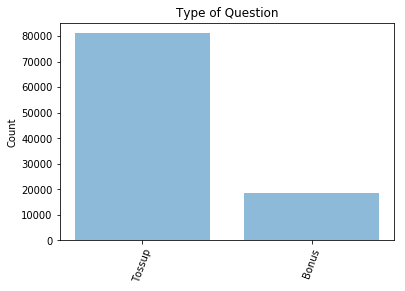

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
c=Counter(data['type'])
labels, values = zip(*c.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, align='center', alpha=0.5)
plt.xticks(indexes, labels)
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.title('Type of Question')
 
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the most common formats (see <sup>[1]</sup>), I would expect literature, history, and science to each represent about a quarter of the questions. It is curious that science is a little underrepresented here--it is possible that instead, as noted in the data description, there have been some classification mix-ups in between history, literature, and mythology. However, it seems appropriate that the fine arts seems to equal roughly the sum of history, literature, and mythology.

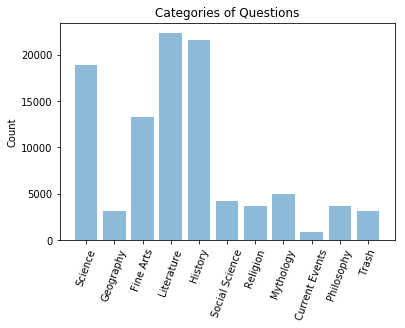

In [9]:
c=Counter(data['categories'])
labels, values = zip(*c.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, align='center', alpha=0.5)
plt.xticks(indexes, labels)
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.title('Categories of Questions')
 
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There were far too many subcategories to look at on a graph that was still readable; instead, I broke down each category to view the distribution of its subcategories.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The plurality of science questions lack a subcategories specification, but we still have substantial amounts of categorized questions, particularly in the core science subjects of biology, chemistry, and physics. The peculiar geographic subcategories have very few questions.

Text(0.5,1,'Science Subcategories')

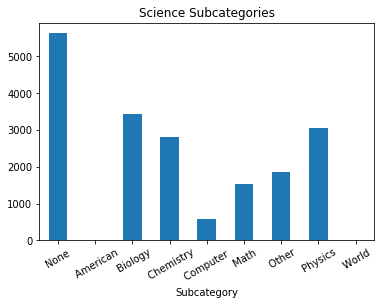

In [10]:
import pandas as pd

mydf = pd.DataFrame({'Text': data['texts'],'Category': data['categories'], 'Subcategory': data['subcategories']})

science = mydf[mydf['Category'] == 'Science']
science_count = science.groupby('Subcategory').size()
science_count = science_count.rename(lambda x: x.replace("Science",""))

science_count.plot.bar(rot=30).set_title('Science Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Essentially none of the geography questions were classified with a subcategory.

Text(0.5,1,'Geography Subcategories')

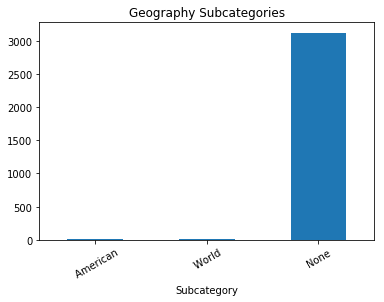

In [11]:
geo = mydf[mydf['Category'] == 'Geography']
geo_count = geo.groupby('Subcategory').size()
geo_count = geo_count.rename(lambda x: x.replace("Geography",""))

geo_count.plot.bar(rot=30).set_title('Geography Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Fine Arts questions had a very slight plurality of questions as unclassified, but a very robust number of questions that were classified as visual or auditory arts.

Text(0.5,1,'Fine Arts Subcategories')

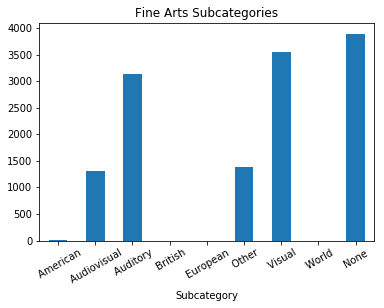

In [12]:
fa = mydf[mydf['Category'] == 'Fine Arts']
fa_count = fa.groupby('Subcategory').size()
fa_count = fa_count.rename(lambda x: x.replace("Fine Arts",""))

fa_count.plot.bar(rot=30).set_title('Fine Arts Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Again, the most common subcategory for literature questions was "None," but other subcategories were well-represented, and generally more evenly than in other categories. One thing to note is that this is the first category so far where the geographic subcategories have any sort of substantive numbers--this matches up well with the most common distribution, which requires a certain proportion of literature questions to be "American," "European," "World," etc. The science distribution, for example, makes no such requirements.<sup>[1]</sup>

Text(0.5,1,'Literature Subcategories')

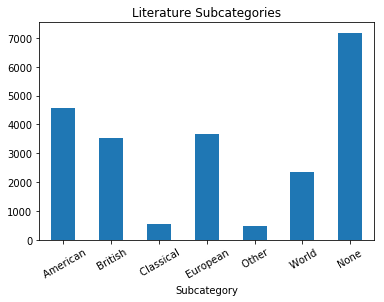

In [13]:
lit = mydf[mydf['Category'] == 'Literature']
lit_count = lit.groupby('Subcategory').size()
lit_count = lit_count.rename(lambda x: x.replace("Literature",""))

lit_count.plot.bar(rot=30).set_title('Literature Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The history subcategories graph looks so much like the literature subcategories graph that one may momentarily think I forgot to change a variable name (note the decrease in British content and increase in "world" content to see that this is not the case). However, it is simply the case that a majority of quizbowlers are American and standard distributions of questions prioritize American content.<sup>[1]</sup>

Text(0.5,1,'History Subcategories')

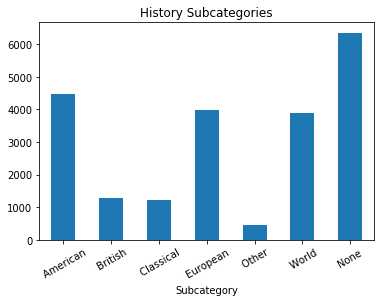

In [14]:
hist = mydf[mydf['Category'] == 'History']
hist_count = hist.groupby('Subcategory').size()
hist_count = hist_count.rename(lambda x: x.replace("History",""))

hist_count.plot.bar(rot=30).set_title('History Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Virtually none of the social science, religion, mythology, or philosophy subcategories have been classified. Unlike in the science subcategory distribution, where it is not standard to have an "American" or "world" requirement, it *is* generally required that a round of questions will not have its questions from these categories be on the same subjects (with the possible exception of philosophy, which does not have a well-defined geographic sub-distribution). That is, if there is a tossup on Christianity, the religions bonus should be on a different religion. <sup>[1]</sup> Further classification of these subcategories may be a good topic for further developing QuizDB.

Text(0.5,1,'Social Science Subcategories')

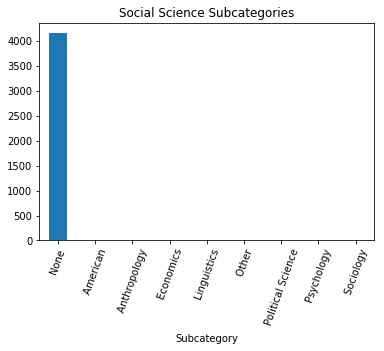

In [15]:
ss = mydf[mydf['Category'] == 'Social Science']
ss_count = ss.groupby('Subcategory').size()
ss_count = ss_count.rename(lambda x: x.replace("Social Science",""))

ss_count.plot.bar(rot=70).set_title('Social Science Subcategories')

Text(0.5,1,'Religion Subcategories')

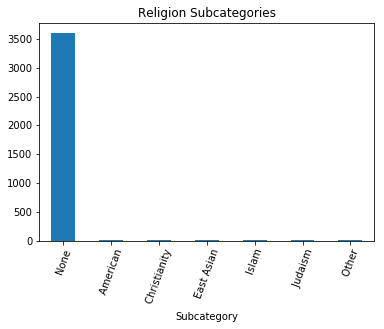

In [16]:
rel = mydf[mydf['Category'] == 'Religion']
rel_count = rel.groupby('Subcategory').size()
rel_count = rel_count.rename(lambda x: x.replace("Religion",""))

rel_count.plot.bar(rot=70).set_title('Religion Subcategories')

Text(0.5,1,'Mythology Subcategories')

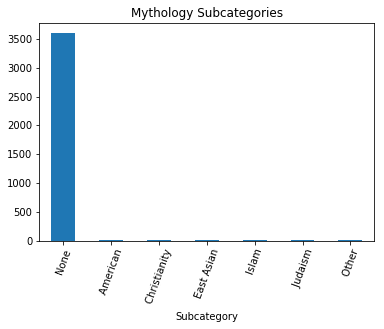

In [17]:
myth = mydf[mydf['Category'] == 'Mythology']
myth_count = myth.groupby('Subcategory').size()
myth_count = rel_count.rename(lambda x: x.replace("Mythology",""))

myth_count.plot.bar(rot=70).set_title('Mythology Subcategories')

Text(0.5,1,'Philosophy Subcategories')

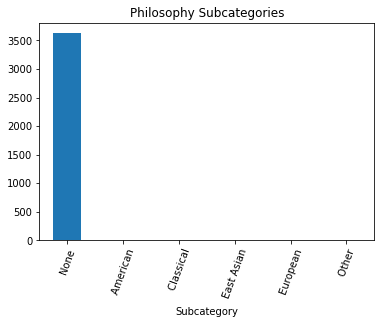

In [18]:
phil = mydf[mydf['Category'] == 'Philosophy']
phil_count = phil.groupby('Subcategory').size()
phil_count = phil_count.rename(lambda x: x.replace("Philosophy",""))

phil_count.plot.bar(rot=70).set_title('Philosophy Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The final two categories, current events and trash, also lack substantial sub-categorization.

Text(0.5,1,'Current Events Subcategories')

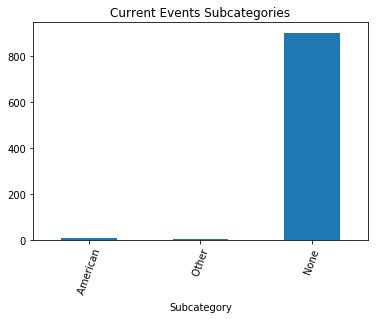

In [19]:
ce = mydf[mydf['Category'] == 'Current Events']
ce_count = ce.groupby('Subcategory').size()
ce_count = ce_count.rename(lambda x: x.replace("Current Events",""))

ce_count.plot.bar(rot=70).set_title('Current Events Subcategories')

Text(0.5,1,'Trash Subcategories')

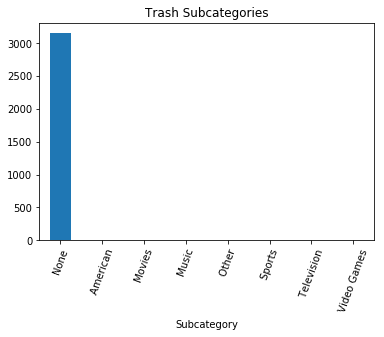

In [20]:
tr = mydf[mydf['Category'] == 'Trash']
tr_count = tr.groupby('Subcategory').size()
tr_count = tr_count.rename(lambda x: x.replace("Trash",""))

tr_count.plot.bar(rot=70).set_title('Trash Subcategories')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For a project that focused heavily on sub-categorization, one might think about removing those subcategories that had very few questions assigned to them. However, when I was working on classifying the larger categories, I did not particularly care if the subcategory for the question was "None" or not.

In [21]:
c=Counter(data['subcategories'])
labels,values = zip(*c.items())

mylabs = list(labels[0:23]) #labels with most elements
mylabs.pop(2) #remove 'none' label

with open('quizdb_classifier_training_data.json', encoding='utf-8') as data_file:
    subcats = json.loads(data_file.read())
    
subcats['type']=[]
for item in subcats['texts']:
    if item.lower().count('answer:')==3:
        subcats['type'].append('Bonus')
    elif item.lower().count('answer:')==1:
        subcats['type'].append('Tossup')
    else:
        subcats['type'].append('Other')
        
others = [i for i, s in enumerate(data['type']) if 'Other' in s]

for index in sorted(others, reverse=True):
    del data['texts'][index]
    del data['categories'][index]
    del data['subcategories'][index]
    del data['type'][index]
        
subs = [i for i, s in enumerate(subcats['subcategories']) if s not in mylabs]

for index in sorted(subs, reverse=True):
        del subcats['texts'][index]
        del subcats['categories'][index]
        del subcats['subcategories'][index]
        del subcats['type'][index]


## IV. Experimental Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I used scikit-learn to create training and test data sets. I used a 80/20 training/test split. I then used scikit-learn's CountVectorizer function (from the feature_extraction module) to create counts for the tfxidf matrix. I set the maximum proportion of documents to 0.5, because I didn't want certain phrases (like "for 10 points") to mess up my models. I also allowed ngrams of 1-2 words. I then used scikit-learn's TfidfTransformer function to transform the counts of the testing and training data, respectively.

In [22]:
from sklearn.model_selection import train_test_split

train, test, trainclass, testclass = train_test_split(data["texts"], data["categories"], train_size=0.8)
    
from sklearn.feature_extraction.text import CountVectorizer

    # count vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=1,max_df=0.5)

traincounts = bigram_vectorizer.fit_transform(train)

from sklearn.feature_extraction.text import TfidfTransformer

    # training tfidf
tfidf_transformer = TfidfTransformer()
traintfidf = tfidf_transformer.fit_transform(traincounts)

    # testing tfidf
testcounts = bigram_vectorizer.transform(test)
tfidf_transformer = TfidfTransformer()
testtfidf= tfidf_transformer.fit_transform(testcounts)

/Users/alexdamisch/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
####### multinomial naive bayes #######

#make classifier
from sklearn.naive_bayes import MultinomialNB

# fit classifier to training data
from sklearn.model_selection import GridSearchCV
multinom_parameters = {'alpha': [1.0e-10, 1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 
                        1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2,0.1]}
multinom=MultinomialNB()
multinom_clf=GridSearchCV(multinom, multinom_parameters)
multinom_clf.fit(traintfidf,trainclass)

#fit to test data
multinom_predicted = multinom_clf.predict(testtfidf)

np.mean(multinom_predicted ==  testclass) 

print(multinom_clf.grid_scores_)

from sklearn import metrics
print(metrics.classification_report(testclass, multinom_predicted))


[mean: 0.89945, std: 0.00044, params: {'alpha': 1e-10}, mean: 0.90215, std: 0.00090, params: {'alpha': 1e-09}, mean: 0.90620, std: 0.00048, params: {'alpha': 1e-08}, mean: 0.91063, std: 0.00098, params: {'alpha': 1e-07}, mean: 0.91471, std: 0.00111, params: {'alpha': 1e-06}, mean: 0.91820, std: 0.00146, params: {'alpha': 1e-05}, mean: 0.91704, std: 0.00204, params: {'alpha': 0.0001}, mean: 0.90768, std: 0.00166, params: {'alpha': 0.001}, mean: 0.91716, std: 0.00117, params: {'alpha': 0.01}, mean: 0.83544, std: 0.00042, params: {'alpha': 0.1}]
                precision    recall  f1-score   support

Current Events       0.87      0.23      0.36       176
     Fine Arts       0.95      0.93      0.94      2712
     Geography       0.90      0.77      0.83       609
       History       0.88      0.95      0.91      4359
    Literature       0.90      0.95      0.93      4437
     Mythology       0.93      0.93      0.93       951
    Philosophy       0.82      0.82      0.82       717
  

/Users/alexdamisch/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


#### Multinomial Naive Bayes

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Multinomial Naive Bayes was the first method that I tried, since Raynor Kuang, who maintains QuizDB and provided me with the test data, said he was already using Naive Bayes to classify questions. I used scikit-learn's grid search function to test out different values of alpha, which is the Laplace/Lidstone smoothing parameter. The default is 1, although its accuracy peaked for values of alpha around 0.00001.

|          Alpha              |             Mean                |       Standard Deviation          |
|-----------------------------|---------------------------------|-----------------------------------|
|            1e-10            |            0.89851              |            0.00125                |
|            1e-09            |            0.90148              |            0.00155                |
|            1e-08            |            0.90495              |            0.00139                |
|            1e-07            |            0.90897              |            0.00084                |
|            1e-06            |            0.91345              |            0.00035                |
|            1e-05            |            0.91699              |            0.00034                |
|            0.0001           |            0.91606              |            0.00047                |
|            0.001            |            0.90591              |            0.00092                |
|            0.01             |            0.91650              |            0.00071                |
|            0.1              |            0.83411              |            0.00184                |

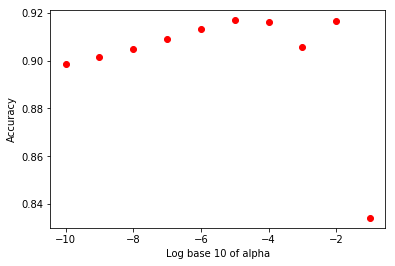

In [24]:
alpha=[1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01]
mean=[0.89851,0.90148,0.90495,0.90897,0.91345,0.91699,0.91606,0.90591,0.91650,0.83411]
plt.plot(np.log10(alpha),mean,'ro')
plt.xlabel('Log base 10 of alpha')
plt.ylabel('Accuracy')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The model with alpha=0.00001 performed the best on science questions, although it also performed quite well on mythology questions--somewhat going against my expectations, for reasons cited in the Data Description. Note how miserably it performed on recall for current events--the model was bad at finding all of the current events examples. However, the recall was excellent for the largest categories of history, literature, science, and fine arts.

In [25]:
print(metrics.classification_report(testclass, multinom_predicted))

                precision    recall  f1-score   support

Current Events       0.87      0.23      0.36       176
     Fine Arts       0.95      0.93      0.94      2712
     Geography       0.90      0.77      0.83       609
       History       0.88      0.95      0.91      4359
    Literature       0.90      0.95      0.93      4437
     Mythology       0.93      0.93      0.93       951
    Philosophy       0.82      0.82      0.82       717
      Religion       0.90      0.81      0.85       752
       Science       0.97      0.98      0.98      3734
Social Science       0.85      0.80      0.82       850
         Trash       0.90      0.52      0.66       661

   avg / total       0.91      0.91      0.91     19958



#### Support Vector Machines

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The next classifier that I tried out was support vector machines. Support vector machines are well-suited to text classification; in particular, the linear kernel is usually recommended because text is often linearly separable.<sup>[14]</sup> When searching for the best support vector machines classifier, I varied the level of C, the penalty parameter. (Normally I would have done a grid search like I did for multinomial naive Bayes, but in this case for whatever reason the grid search was *torturously* slow, so I ran the linear support vector classifiers separately.) The case of C=5 and C=50 may just seem like a case of misplaced decimal point when testing code, but they really did output the exact same mean accuracy! The most accurate classifier had C=5 (or C=50), just a little more penalized than the default value of C=1. 

|          C                  |             Mean                | 
|-----------------------------|---------------------------------|
|            0.005            | 0.79076059725423387             |
|            0.5              | 0.92424090590239505             | 
|            1                | 0.92524301032167555             | 
|            5                | 0.92604469385709987             | 
|            10               | 0.92594448341517188             | 
|            50               | 0.92604469385709987             |   


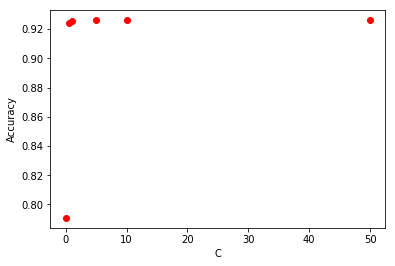

In [26]:
c=[0.005,0.5,1,5,10,50]
mean=[.79076059725423387,.92424090590239505,.92524301032167555,.92604469385709987,.92594448341517188,.92604469385709987]
plt.plot(c,mean,'ro')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I chose C=5 for the classification report below instead of C=50, because it was closer to the default value of C=1 and the improvements were only marginal. Overall, it actually looks remarkably similar to the statistics for the multinomial naive Bayes classifier. The science questions seem to be the easiest to classify, which is unsurprising because of the unique vocabulary in many technical fields. This classifier was also remarkably successful at classifying literature, in both precision and recall. Current events was once again a struggle across the board.

In [27]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=5.0)
svm_clf.fit(traintfidf,trainclass)
svc_predicted = svm_clf.predict(testtfidf)

print(metrics.classification_report(testclass, svc_predicted))


                precision    recall  f1-score   support

Current Events       0.79      0.56      0.66       176
     Fine Arts       0.95      0.95      0.95      2712
     Geography       0.87      0.86      0.87       609
       History       0.91      0.94      0.93      4359
    Literature       0.95      0.95      0.95      4437
     Mythology       0.93      0.95      0.94       951
    Philosophy       0.81      0.85      0.83       717
      Religion       0.87      0.86      0.86       752
       Science       0.96      0.98      0.97      3734
Social Science       0.84      0.80      0.82       850
         Trash       0.88      0.65      0.75       661

   avg / total       0.92      0.92      0.92     19958



#### Multinomial Logistic Regression

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The final classifier that I looked at was multinomial logistic regression. There were a couple of choices to be made here: First, whether the logistic regression should be fit as "one-versus-rest," or as a true multinomial. In the former option, each label is fit as a binary logistic regression problem. In the latter option, a logistic regression is fit across all possible labels.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Because grid search was again taking a long time, I first tried the two solvers against each other, with the default penalty term C. The multinomial solver ended up having better accuracy, so I then looked at different values of C for the multinomial solver.

|          Solver             |           Accuracy              | 
|-----------------------------|---------------------------------|
|            One-Versus-Rest  |    0.90520092193606572          |
|         Multinomial         | 0.91970802919708028             | 

|          C                  |           Mean                  | 
|-----------------------------|---------------------------------|
|        0.001                |          0.42652                |
|        0.01                 |    0.63537                      |
|        0.1                  |    0.76714                      | 
|        1                    |    0.88847                      | 
|        10                   |     0.91149                     | 
|        100                  |             0.91572             |
|        1000                 |             0.91710             |

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It is clear that accuracy increases with increased penalty, in this case, but there are also diminishing marginal returns on accuracy.

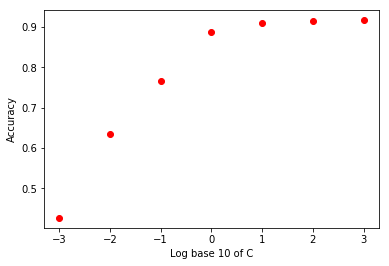

In [28]:
c=[0.001,0.01,0.1,1,10,100,1000]
mean=[0.42652,0.63537,0.76714, 0.88847,0.91149,0.91572,0.91710]
plt.plot(np.log10(c),mean,'ro')
plt.xlabel('Log base 10 of C')
plt.ylabel('Accuracy')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
cg_logreg = LogisticRegression(multi_class='multinomial',
                            solver='newton-cg')
cg_logreg.fit(traintfidf,trainclass)
cg_predicted = cg_logreg.predict(testtfidf) 
np.mean(cg_predicted ==  testclass) 


0.9068543942278785

## V. Experimental Results

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I attempted three different methods to classify the categories of the questions: multinomial naive Bayes, support vector machines, and multinomial logistic regression. In general, all of the classifiers performed very well; at their best (that is, with the right parameter optimization), they all performed just above Raynor Kuang's casual estimate of 90% accuracy<sup>[9]</sup>. However, the linear support vector machines with a slightly larger than default penalty parameter performed the best, with precision and recall across all categories averaging around 93%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below is the confusion matrix for the support vector machine with C=5. It looks like the most common confusion was between history and social studies and history and trash.

In [31]:
from sklearn.metrics import confusion_matrix
print("        CE     ","FA  ","Ge  ","Hi   ","Li   ","My   ","Ph   ","Re   ",
      "Sc   ","SS   ","Tr   ")
confusion_matrix(testclass, svc_predicted)

        CE      FA   Ge   Hi    Li    My    Ph    Re    Sc    SS    Tr   


array([[  99,    1,    5,   64,    3,    0,    0,    1,    2,    0,    1],
       [   0, 2579,    9,   21,   44,    4,    6,    9,   10,    9,   21],
       [   1,   12,  526,   51,    4,    1,    0,    0,    7,    5,    2],
       [  16,   33,   52, 4115,   33,   11,    6,   33,   23,   27,   10],
       [   0,   45,    1,   48, 4194,   24,   54,   17,   15,   22,   17],
       [   0,    1,    0,    9,   24,  899,    2,   13,    2,    0,    1],
       [   0,    4,    0,   10,   37,    0,  606,    9,   12,   39,    0],
       [   1,    5,    2,   40,   11,   23,   14,  646,    7,    2,    1],
       [   0,    2,    5,   28,    1,    1,   11,    1, 3664,   20,    1],
       [   2,    5,    2,   52,   19,    0,   48,    8,   29,  683,    2],
       [   6,   34,    3,   76,   57,    6,    1,    8,   30,   10,  430]])

## VI. Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Overall the support vector machine with penalty parameter C=5 was the most successful classifier, but each classifier was fairly successful on the data set. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There were many limitations of this case study, and many opportunities for future work on this problem. The problem of subcategories was not touched in this case study because categories enough provided enough material for discussion; however, that is the most obvious place where more work could be done. I would be interested to see how a stacking ensemble approach would work (where one first classifies by category and then does a second pass for subcategory), as opposed to trying to classify subcategories immediately. One could also manually classify a certain number of training examples in the many categories whose subcategories have barely been classified, and train classifiers to identify other questions.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It is clear that quizbowl questions provide a robust and interesting data set for supervised classification of large amounts of text.

## Appendices

### Citations
<sup>[1]</sup> Packet Submission Guidelines. (n.d.). *Academic Competition Federation.* Retrieved November 26, 2017, from https://acf-quizbowl.com/tournaments/packet-submission-guidelines/#distribution

<sup>[2]</sup> Jackson, M. (2013, September 22). What Is Quizbowl? A Primer and FAQ for Newcomers. *Partnership for Academic Competition Excellence.* Retrieved November 25, 2017, from http://www.pace-nsc.org/what-is-quizbowl-a-primer-and-faq-for-newcomers/

<sup>[3]</sup> Question Recycling. (n.d.). In *QBWiki*. Retrieved November 26, 2017, from https://www.qbwiki.com/wiki/Question_recycling

<sup>[4]</sup> Schindler, M. (2013, February 2). So You Want to Study Quizbowl [Msg 1]. Message posted to http://www.hsquizbowl.org/forums/viewtopic.php?f=30&t=14099

<sup>[5]</sup> Quizbowl software. (n.d.). In *QBWiki*. Retrieved November 26, 2017, from https://www.qbwiki.com/wiki/Quizbowl_software#Question_databases

<sup>[6]</sup>  Kuang, R. (2017, September 10). Announcing QuizDB: "Knowledge is Power" [Msg 1]. Message posted to http://www.hsquizbowl.org/forums/viewtopic.php?f=123&t=20407

<sup>[7]</sup> Zhang, M. (2017, July 21). PACE Membership Status Changes 2017-18 [Msg 1]. Message posted to http://www.hsquizbowl.org/forums/viewtopic.php?f=6&t=20185&p=333787

<sup>[8]</sup> Kuang, R. (2017, November 08). Re: Announcing QuizDB: "Knowledge is Power" [Msg 42]. Message posted to http://www.hsquizbowl.org/forums/viewtopic.php?f=123&t=20407

<sup>[9]</sup> Kuang, R. (2017, October 16). Re: Undelivered Mail Returned to Sender [E-mail to the author].

<sup>[10]</sup> Clarke, V. (2017, January 19). 2017 Eisenhower Memorial Tournament - Global Announcement [Msg 1]. Message posted to http://hsquizbowl.org/forums/viewtopic.php?f=8&t=19515

<sup>[11]</sup> Kandlikar, G. (2014, June 23). ACF Fall 2014 Global Announcement (11/8/14) [Msgs 1-3]. Messages posted to http://hsquizbowl.org/forums/viewtopic.php?f=21&t=16023&p=291678

<sup>[12]</sup> Trash. (n.d.). In *QBWiki*. Retrieved November 27, 2017, from https://www.qbwiki.com/wiki/Trash

<sup>[13]</sup> Lawrence, J. (2017, September 12). Re: The Spring Open: What Is to be Done? [Msg 5]. Message posted to http://hsquizbowl.org/forums/viewtopic.php?f=97&t=20420&p=335281#p335281

<sup>[14]</sup> Kowalczyk, A. (2014, October 19). Linear Kernel: Why is it recommended for text classification? Retrieved November 27, 2017, from https://www.svm-tutorial.com/2014/10/svm-linear-kernel-good-text-classification/

### Code
#### Data Description
    import os
    os.chdir('/Users/alexdamisch/Desktop')
    import json
    with open('quizdb_classifier_training_data.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())
    data['texts'][1491]
    data['texts'][84391]
#### Data Cleaning and Analysis

    # Counting 'answer' string to determine if it was a tossup or bonus:
    data['type']=[]
    for item in data['texts']:
        if item.lower().count('answer')==3:
            data['type'].append('Bonus')
        elif item.lower().count('answer')==1:
            data['type'].append('Tossup')
        else:
            data['type'].append('Other')
    # How many questions were categorized 'Other'?
    from collections import Counter
    c=Counter(data['categories'])
    print(c.items()) # dict_items([('Tossup', 81152), ('Other', 194), ('Bonus', 18660)])
    
    # Delete questions categorized 'Other'
    others = [i for i, s in enumerate(data['type']) if 'Other' in s] # List of indices

    for index in sorted(others, reverse=True):
        del data['texts'][index]
        del data['categories'][index]
        del data['subcategories'][index]
        del data['type'][index]

    # Delete questions categorized 'None':
    
    nones = [i for i, s in enumerate(data['categories']) if 'None' in s]

    for index in sorted(nones, reverse=True):
        del data['texts'][index]
        del data['categories'][index]
        del data['subcategories'][index]
        del data['type'][index]

    # Double check that the 'None' questions were deleted correctly:
    c=Counter(data['categories'])
    print(c.items()) #dict_items([('Science', 18957), ('Geography', 3140), ('Fine Arts', 13285), ('Literature', 22388), ('History', 21653), ('Social Science', 4192), ('Religion', 3632), ('Mythology', 4932), ('Current Events', 919), ('Philosophy', 3648), ('Trash', 3184)])
    
    # Type of question plot
    import matplotlib.pyplot as plt
    import numpy as np
    c=Counter(data['type'])
    labels, values = zip(*c.items())
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, align='center', alpha=0.5)
    plt.xticks(indexes, labels)
    plt.xticks(rotation=70)
    plt.ylabel('Count')
    plt.title('Type of Question')
    plt.show()
    
    # Categories plot
    c=Counter(data['categories'])
    labels, values = zip(*c.items())
    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, align='center', alpha=0.5)
    plt.xticks(indexes, labels)
    plt.xticks(rotation=70)
    plt.ylabel('Count')
    plt.title('Categories of Questions')
 
    plt.show()
    
    # Subcategories plots
    # I'll show one example here, because the rest only involve changing a few letters around
    import pandas as pd

    mydf = pd.DataFrame({'Text': data['texts'],'Category': data['categories'], 'Subcategory': data['subcategories']})

    science = mydf[mydf['Category'] == 'Science'] # Replace 'Science" in other iterations and rename
    science_count = science.groupby('Subcategory').size()
    science_count = science_count.rename(lambda x: x.replace("Science","")) # Replace 'Science" in other iterations

    science_count.plot.bar(rot=30).set_title('Science Subcategories') # Rename in other iterations
 
#### Experimental Results
#### Experimental Analysis

    from sklearn.model_selection import train_test_split

    train, test, trainclass, testclass = train_test_split(data["texts"],
                    data["categories"], train_size=0.8)
    
    from sklearn.feature_extraction.text import CountVectorizer

    # count vectorizer
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
    min_df=1,max_df=0.5)

    traincounts = bigram_vectorizer.fit_transform(train)

    from sklearn.feature_extraction.text import TfidfTransformer

    # training tfidf
    tfidf_transformer = TfidfTransformer()
    traintfidf = tfidf_transformer.fit_transform(traincounts)

    # testing tfidf
    testcounts = bigram_vectorizer.transform(test)
    tfidf_transformer = TfidfTransformer()
    testtfidf= tfidf_transformer.fit_transform(testcounts)
    
    ####### multinomial naive bayes #######

    #make classifier
    from sklearn.naive_bayes import MultinomialNB

    # fit classifier to training data
    from sklearn.model_selection import GridSearchCV
    multinom_parameters = {'alpha': [1.0e-10, 1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 
                        1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2,0.1]}
    multinom=MultinomialNB()
    multinom_clf=GridSearchCV(multinom, multinom_parameters)
    multinom_clf.fit(traintfidf,trainclass)

    #fit to test data
    multinom_predicted = multinom_clf.predict(testtfidf)

    import numpy as np
    np.mean(multinom_predicted ==  testclass) 

    multinom_clf.grid_scores_
    #multinom_clf.best_estimator_

    from sklearn import metrics
    print(metrics.classification_report(testclass, multinom_predicted))
    
    from matplotlib import pyplot as plt
    alpha=[1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01]
    mean=[0.89851,0.90148,0.90495,0.90897,0.91345,0.91699,0.91606,0.90591,0.91650,0.83411]
    plt.plot(np.log10(alpha),mean,'ro')
    plt.xlabel('Log base 10 of alpha')
    plt.ylabel('Accuracy')
    plt.show()


    ####### Linear Support Vector Machines #######
    
    from sklearn.svm import LinearSVC
    clf = LinearSVC(C=50.0) #Replace for different values of C
    clf.fit(traintfidf,trainclass)
    svc_predicted = clf.predict(testtfidf)
    np.mean(predicted ==  testclass)
    
    c=[0.005,0.5,1,5,10,15]
    mean=[.79076059725423387,.92424090590239505, .92524301032167555, .92604469385709987, .92594448341517188, .92604469385709987]
    plt.plot(c,mean,'ro')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.show()
    
    ########## Multinomial Logistic Regression ##########

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
     
    # One-versus-rest classifier
    
    ovr_logreg = LogisticRegression(multi_class='ovr')
    ovr_logreg.fit(traintfidf,trainclass) #took only a few min
    ovr_predicted = ovr_logreg.predict(testtfidf)
    np.mean(ovr_predicted ==  testclass)  
    
    # Multinomial classifier
    
    cg_logreg = LogisticRegression(multi_class='multinomial',
                            solver='newton-cg')
    cg_logreg.fit(traintfidf,trainclass)
    cg_predicted = cg_logreg.predict(testtfidf) 
    np.mean(cg_predicted ==  testclass) 
